# Stock Price Prediction Project using Deep leaning

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense

In [3]:
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 20, 10

In [4]:
df = pd.read_csv("NSE-Tata-Global-Beverages-Limited.csv")

df.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-10-08,208.00,222.25,206.85,216.00,215.15,4642146.0,10062.83
1,2018-10-05,217.00,218.60,205.90,210.25,209.20,3519515.0,7407.06
2,2018-10-04,223.50,227.80,216.15,217.25,218.20,1728786.0,3815.79
3,2018-10-03,230.00,237.50,225.75,226.45,227.60,1708590.0,3960.27
4,2018-10-01,234.55,234.60,221.05,230.30,230.90,1534749.0,3486.05


In [5]:
df["Date"] = pd.to_datetime(df["Date"], format="%Y-%m-%d")


In [6]:
df.index = df["Date"]

df.index

DatetimeIndex(['2018-10-08', '2018-10-05', '2018-10-04', '2018-10-03',
               '2018-10-01', '2018-09-28', '2018-09-27', '2018-09-26',
               '2018-09-25', '2018-09-24',
               ...
               '2013-10-22', '2013-10-21', '2013-10-18', '2013-10-17',
               '2013-10-15', '2013-10-14', '2013-10-11', '2013-10-10',
               '2013-10-09', '2013-10-08'],
              dtype='datetime64[ns]', name='Date', length=1235, freq=None)

In [7]:
df.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
Date,,,,,,,,
2018-10-08,2018-10-08,208.00,222.25,206.85,216.00,215.15,4642146.0,10062.83
2018-10-05,2018-10-05,217.00,218.60,205.90,210.25,209.20,3519515.0,7407.06
2018-10-04,2018-10-04,223.50,227.80,216.15,217.25,218.20,1728786.0,3815.79
2018-10-03,2018-10-03,230.00,237.50,225.75,226.45,227.60,1708590.0,3960.27
2018-10-01,2018-10-01,234.55,234.60,221.05,230.30,230.90,1534749.0,3486.05


In [8]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Last', 'Close', 'Total Trade Quantity',
       'Turnover (Lacs)'],
      dtype='object')

# Visualize close price history

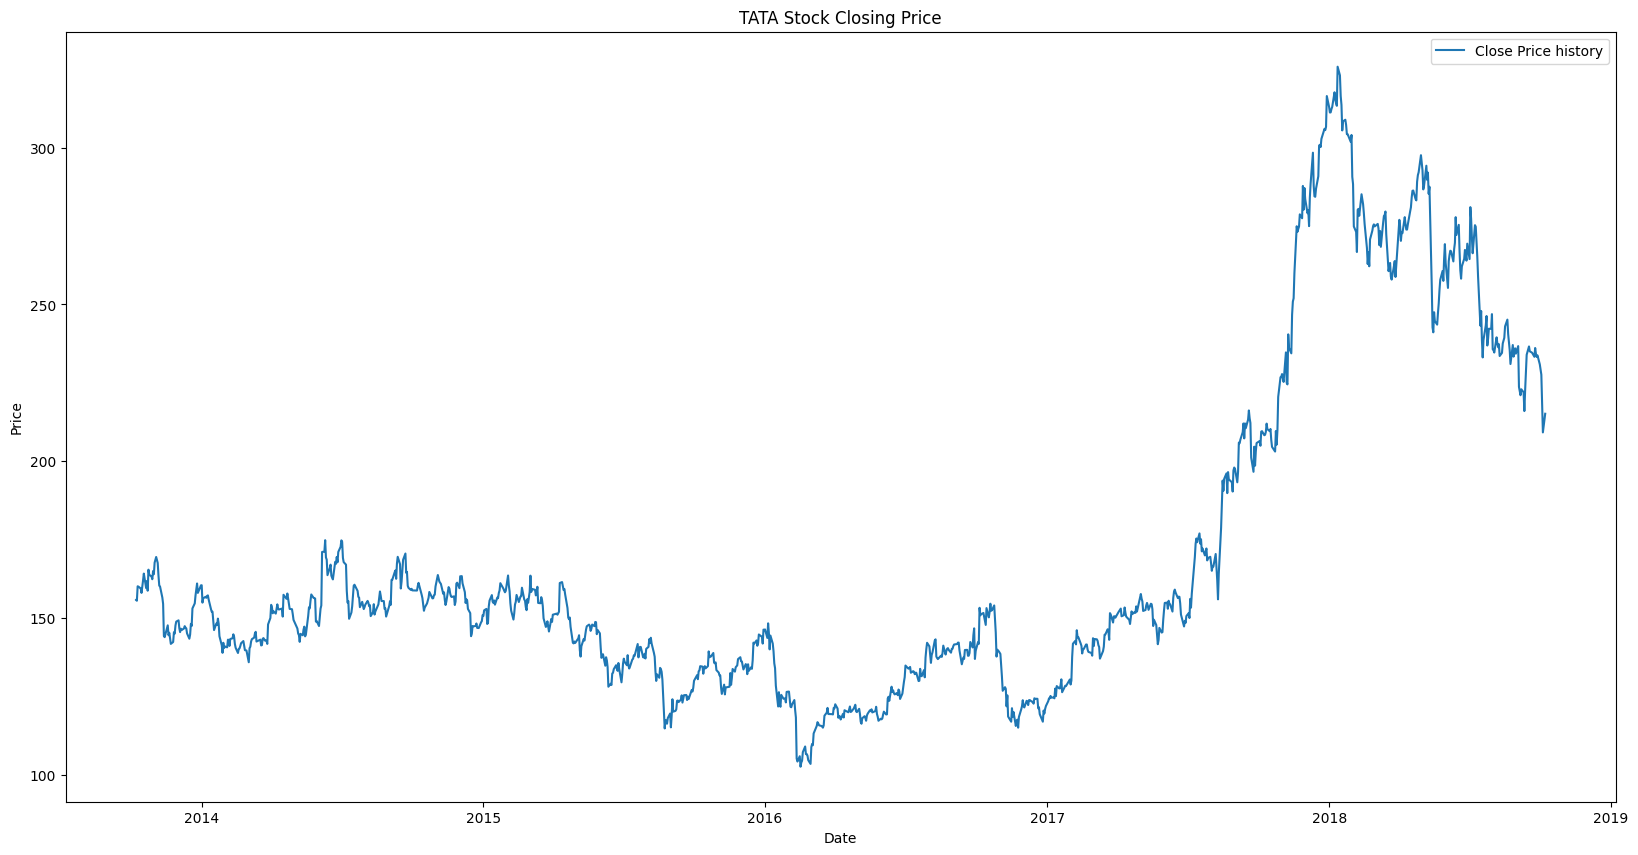

In [9]:

plt.plot(df["Close"], label='Close Price history')
plt.title("TATA Stock Closing Price")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()

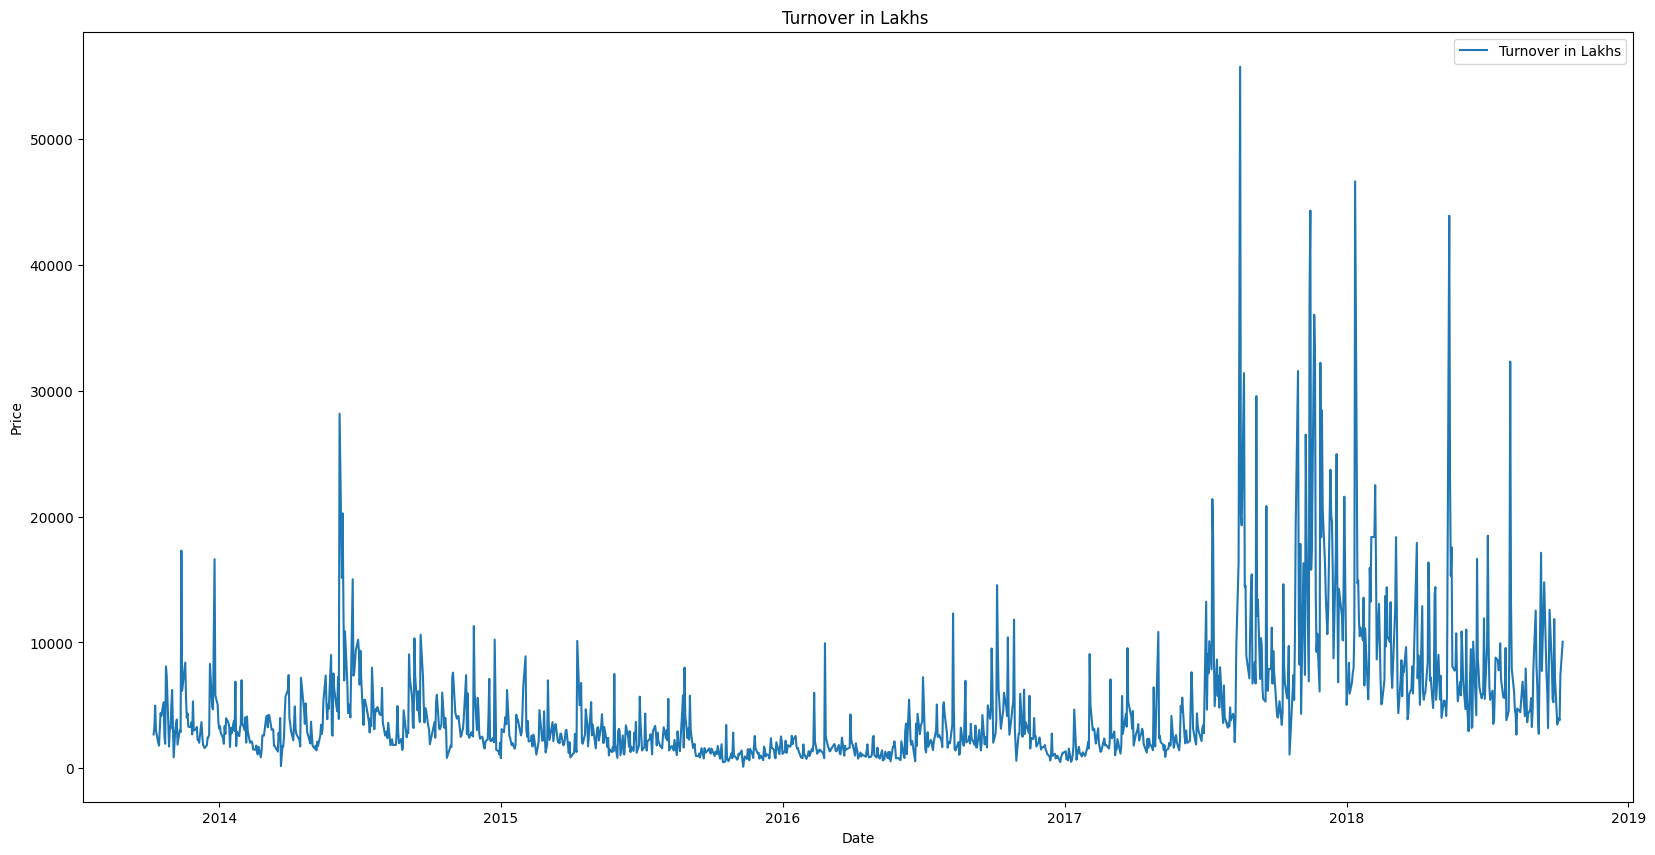

In [10]:

plt.plot(df["Turnover (Lacs)"], label='Turnover in Lakhs')
plt.title("Turnover in Lakhs ")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()

#  Prepare Data for LSTM

In [11]:
data = df.sort_index(ascending=True, axis=0)
data

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
Date,,,,,,,,
2013-10-08,2013-10-08,157.00,157.80,155.20,155.80,155.80,1720413.0,2688.94
2013-10-09,2013-10-09,155.70,158.20,154.15,155.30,155.55,2049580.0,3204.49
2013-10-10,2013-10-10,156.00,160.80,155.85,160.30,160.15,3124853.0,4978.80
2013-10-11,2013-10-11,161.15,163.45,159.00,159.80,160.05,1880046.0,3030.76
2013-10-14,2013-10-14,160.85,161.45,157.70,159.30,159.45,1281419.0,2039.09
...,...,...,...,...,...,...,...,...
2018-10-01,2018-10-01,234.55,234.60,221.05,230.30,230.90,1534749.0,3486.05
2018-10-03,2018-10-03,230.00,237.50,225.75,226.45,227.60,1708590.0,3960.27
2018-10-04,2018-10-04,223.50,227.80,216.15,217.25,218.20,1728786.0,3815.79


In [12]:
# Sort data and create new dataframe with Date and Close only
data = df.sort_index(ascending=True, axis=0)
new_dataset = pd.DataFrame(index=range(0, len(data)), columns=['Date', 'Close'])

for i in range(0, len(data)):
    new_dataset["Date"][i] = data["Date"][i]
    new_dataset["Close"][i] = data["Close"][i]

# Set index and drop 'Date' for training
new_dataset.index = new_dataset["Date"]
new_dataset.drop("Date", axis=1, inplace=True)


C:\Users\aryan\AppData\Local\Temp\ipykernel_33416\3411848199.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  new_dataset["Date"][i] = data["Date"][i]
C:\Users\aryan\AppData\Local\Temp\ipykernel_33416\3411848199.py:6: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignm

In [13]:
new_dataset

,Close
Date,
2013-10-08,155.8
2013-10-09,155.55
2013-10-10,160.15
2013-10-11,160.05
2013-10-14,159.45
...,...
2018-10-01,230.9
2018-10-03,227.6
2018-10-04,218.2


In [14]:
new_dataset.index

DatetimeIndex(['2013-10-08', '2013-10-09', '2013-10-10', '2013-10-11',
               '2013-10-14', '2013-10-15', '2013-10-17', '2013-10-18',
               '2013-10-21', '2013-10-22',
               ...
               '2018-09-24', '2018-09-25', '2018-09-26', '2018-09-27',
               '2018-09-28', '2018-10-01', '2018-10-03', '2018-10-04',
               '2018-10-05', '2018-10-08'],
              dtype='datetime64[ns]', name='Date', length=1235, freq=None)

#  Create Train/Validation Split and Scale

In [15]:
data.shape

(1235, 8)

In [16]:
# Prepare train and validation datasets
final_dataset = new_dataset.values
train_data = final_dataset[0:987, :]
valid_data = final_dataset[987:, :]

In [17]:
final_dataset

array([[np.float64(155.8)],
       [np.float64(155.55)],
       [np.float64(160.15)],
       ...,
       [np.float64(218.2)],
       [np.float64(209.2)],
       [np.float64(215.15)]], dtype=object)

# Normalize the data  and preprocessing 

In [18]:
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense

In [19]:
# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(final_dataset)

scaled_data

array([[0.23823398],
       [0.2371134 ],
       [0.25773196],
       ...,
       [0.51792918],
       [0.47758853],
       [0.50425818]])

#  Create Training Data for LSTM

In [20]:
# Create x_train and y_train


x_train_data, y_train_data = [], []

for i in range(60, len(train_data)):
    x_train_data.append(scaled_data[i-60:i, 0])
    y_train_data.append(scaled_data[i, 0])

x_train_data, y_train_data = np.array(x_train_data), np.array(y_train_data)
x_train_data = np.reshape(x_train_data, (x_train_data.shape[0], x_train_data.shape[1], 1))


#  Build and Train LSTM Model

In [21]:
# Build LSTM model
lstm_model = Sequential()
lstm_model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train_data.shape[1], 1)))
lstm_model.add(LSTM(units=50))
lstm_model.add(Dense(1))



C:\Users\aryan\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)



# Compile and fit model

In [22]:

# Compile and fit model
lstm_model.compile(loss='mean_squared_error', optimizer='adam')
lstm_model.fit(x_train_data, y_train_data, epochs=1, batch_size=1, verbose=2)

927/927 - 11s - 11ms/step - loss: 0.0012


# Prepare Test Data and Predict

In [23]:
print(new_dataset)


             Close
Date              
2013-10-08   155.8
2013-10-09  155.55
2013-10-10  160.15
2013-10-11  160.05
2013-10-14  159.45
...            ...
2018-10-01   230.9
2018-10-03   227.6
2018-10-04   218.2
2018-10-05   209.2
2018-10-08  215.15

[1235 rows x 1 columns]


In [24]:
print(valid_data)

[[np.float64(208.3)]
 [np.float64(208.45)]
 [np.float64(209.4)]
 [np.float64(212.0)]
 [np.float64(210.25)]
 [np.float64(209.6)]
 [np.float64(210.3)]
 [np.float64(206.8)]
 [np.float64(204.6)]
 [np.float64(203.1)]
 [np.float64(209.65)]
 [np.float64(205.3)]
 [np.float64(209.8)]
 [np.float64(220.5)]
 [np.float64(226.8)]
 [np.float64(226.95)]
 [np.float64(227.8)]
 [np.float64(226.35)]
 [np.float64(225.3)]
 [np.float64(234.7)]
 [np.float64(225.0)]
 [np.float64(224.5)]
 [np.float64(240.45)]
 [np.float64(236.15)]
 [np.float64(234.4)]
 [np.float64(246.7)]
 [np.float64(250.9)]
 [np.float64(251.95)]
 [np.float64(259.9)]
 [np.float64(274.9)]
 [np.float64(273.15)]
 [np.float64(274.05)]
 [np.float64(274.8)]
 [np.float64(278.7)]
 [np.float64(277.45)]
 [np.float64(287.75)]
 [np.float64(280.2)]
 [np.float64(287.1)]
 [np.float64(283.55)]
 [np.float64(279.05)]
 [np.float64(279.95)]
 [np.float64(274.95)]
 [np.float64(284.0)]
 [np.float64(288.45)]
 [np.float64(298.35)]
 [np.float64(287.8)]
 [np.float64(284

In [25]:
# Prepare test data
inputs_data = new_dataset[len(new_dataset) - len(valid_data) - 60:].values
inputs_data = inputs_data.reshape(-1, 1)

inputs_data = scaler.transform(inputs_data)

X_test = []
for i in range(60, inputs_data.shape[0]):
    X_test.append(inputs_data[i-60:i, 0])

X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))



# Predict and inverse scale


closing_price = lstm_model.predict(X_test)
closing_price = scaler.inverse_transform(closing_price)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


# Save Model in .h5 file

In [26]:
# Save the model
lstm_model.save("saved_lstm_model.h5")


# dump code using pickle

In [27]:
import pickle
import pandas as pd

# Save the scaler safely
with open("scaler.pkl", "wb") as f:
    pickle.dump(scaler, f)

# Save predictions to CSV
valid_data = new_dataset[987:].copy()
valid_data['Predictions'] = closing_price
valid_data.to_csv("predictions.csv", index=False)


In [28]:
print(valid_data.shape, closing_price.shape)


(248, 2) (248, 1)


# closing_price have prection vlaue

In [29]:
print(valid_data.head())


             Close  Predictions
Date                           
2017-10-09   208.3   199.340500
2017-10-10  208.45   200.390625
2017-10-11   209.4   201.188385
2017-10-12   212.0   201.862793
2017-10-13  210.25   202.723022
